In [61]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [62]:
keras = tf.keras
# wget the file from https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
with open("Data/companies.csv") as corpus_file:
    corpus = corpus_file.read()
    corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Loaded a corpus of 2567986 characters


In [63]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

Our corpus contains 150 unique characters.


In [64]:
print(encoding)
print(decoding)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, '&': 7, "'": 8, '(': 9, ')': 10, '*': 11, '+': 12, ',': 13, '-': 14, '.': 15, '/': 16, '0': 17, '1': 18, '2': 19, '3': 20, '4': 21, '5': 22, '6': 23, '7': 24, '8': 25, '9': 26, ':': 27, '=': 28, '>': 29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35, 'E': 36, 'F': 37, 'G': 38, 'H': 39, 'I': 40, 'J': 41, 'K': 42, 'L': 43, 'M': 44, 'N': 45, 'O': 46, 'P': 47, 'Q': 48, 'R': 49, 'S': 50, 'T': 51, 'U': 52, 'V': 53, 'W': 54, 'X': 55, 'Y': 56, 'Z': 57, '[': 58, '\\': 59, ']': 60, '^': 61, '_': 62, 'a': 63, 'b': 64, 'c': 65, 'd': 66, 'e': 67, 'f': 68, 'g': 69, 'h': 70, 'i': 71, 'j': 72, 'k': 73, 'l': 74, 'm': 75, 'n': 76, 'o': 77, 'p': 78, 'q': 79, 'r': 80, 's': 81, 't': 82, 'u': 83, 'v': 84, 'w': 85, 'x': 86, 'y': 87, 'z': 88, '{': 89, '|': 90, '}': 91, '~': 92, '\x81': 93, '\x82': 94, '\x83': 95, '\x84': 96, '\x85': 97, '\x86': 98, '\x87': 99, '\x88': 100, '\x89': 101, '\x8a': 102, '\x8b': 103, '\x8c': 104, '\x8d': 105, '\x8e': 

## Many to one approach

In [65]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
sentence_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - sentence_length, skip):
    sentence = corpus[i:i + sentence_length]
    next_char = corpus[i + sentence_length]
    X_data.append([encoding[char] for char in sentence])
    y_data.append(encoding[next_char])

num_sentences = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_sentences, sentence_length))

Sliced our corpus into 855992 sentences of length 10


In [66]:
print('Encoded data[0]  : {}'.format(X_data[0]))
print('Decoded data[0]  : {}'.format([decoding[idx] for idx in X_data[0]]))
print('Target of data[0]: {}'.format(decoding[y_data[0]]))

Encoded data[0]  : [39, 63, 81, 70, 78, 74, 63, 87, 1, 40]
Decoded data[0]  : ['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'I']
Target of data[0]: n


In [67]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_sentences, sentence_length, num_chars), dtype=bool)
y = np.zeros((num_sentences, num_chars), dtype=bool)
for i, sentence in enumerate(X_data):
    for t, encoded_char in enumerate(sentence):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sentences: {1} Characters in corpus: {2}"
      .format(y.shape, num_sentences, len(chars)))
print("Sanity check X. Dimension: {0} Sentence length: {1}"
      .format(X.shape, sentence_length))

Sanity check y. Dimension: (855992, 150) # Sentences: 855992 Characters in corpus: 150
Sanity check X. Dimension: (855992, 10, 150) Sentence length: 10


In [68]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(64, input_shape=(sentence_length, num_chars), 
                    return_sequences=False))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                13760     
                                                                 
 dense_3 (Dense)             (None, 150)               9750      
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
Total params: 23,510
Trainable params: 23,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
6688/6688 [==============================] - 48s 7ms/step - loss: 2.6053 - accuracy: 0.2777
Epoch 2/5
6688/6688 [==============================] - 43s 6ms/step - loss: 2.3090 - accuracy: 0.3460
Epoch 3/5
6688/6688 [==============================] - 42s 6ms/step - loss: 2.2366 - accuracy: 0.3651
Epoch 4/5
6688/6688 [==============================] - 43s 6ms/step - loss: 2.1959 - accuracy: 0.3765
Epoch 5/5
6688/6688 [==============================] - 58s 9ms/step - loss: 2.1697 - accuracy: 0.3835


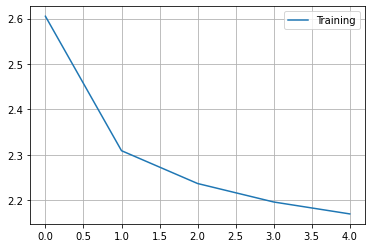

In [69]:
#training time
log = model.fit(X, y, epochs=5, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [70]:
sentence_length =10
def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, sentence_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed()
print("seed = " + seed_pattern)

X = np.zeros((1, sentence_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

seed = herapeutic
s
Lear Carmer
ymantix
&iAR Bioneshing
Shose DitaSint & Labs
Amanence
Bussem AOx Sofitios
Lealvarmenss
Buskent
Liay Petentes
Atiing Plogice
Ava Bia
AMO3NSpornations
APe Incustries
Richfht Internytion
Hyngrabor Solutions
Aimaltie
Pulliscane
Aliavascalis
SuelyMespur LLC
Silad Renealty Infint Telan Mynzure Commindgey
Bumination Storing Figetsy Ade Gasing Phetfermence
Hawialy
Chital eencar
inssea Intearrienty Strees
Clyener Plo Ltd
"Eachrombort
KicGoookcuing Connesty Trus.com
Hequisy Abs
Alty Treed I


## Many to many approach

In [49]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
sentence_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - sentence_length, skip):
    sentence = corpus[i:i + sentence_length]
    next_char = corpus[i+1:i+1 + sentence_length]
    X_data.append([encoding[char] for char in sentence])
    y_data.append([encoding[char] for char in next_char])

num_sentences = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_sentences, sentence_length))

Sliced our corpus into 855992 sentences of length 10


In [50]:
print(X_data[0])

[39, 63, 81, 70, 78, 74, 63, 87, 1, 40]


In [51]:
print([decoding[idx] for idx in X_data[0]])
print([decoding[idx] for idx in y_data[0]])

['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'I']
['a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'I', 'n']


In [52]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_sentences, sentence_length, num_chars), dtype=bool)
y = np.zeros((num_sentences, sentence_length, num_chars), dtype=bool)
for i, sentence in enumerate(X_data):
    for t, encoded_char in enumerate(sentence):
        X[i, t, encoded_char] = 1
for i, sentence in enumerate(y_data):
    for t, encoded_char in enumerate(sentence):
        y[i, t, encoded_char] = 1

In [53]:
# Define our model
modelmm = keras.models.Sequential()
modelmm.add(keras.layers.SimpleRNN(256, input_shape=(sentence_length, num_chars), 
                    return_sequences=True))
modelmm.add(keras.layers.TimeDistributed(keras.layers.Dense(num_chars,
                                                          activation='softmax')))
modelmm.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
modelmm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10, 256)           104192    
                                                                 
 time_distributed (TimeDistr  (None, 10, 150)          38550     
 ibuted)                                                         
                                                                 
Total params: 142,742
Trainable params: 142,742
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6688/6688 [==============================] - 99s 15ms/step - loss: 2.2826 - accuracy: 0.3511
Epoch 2/10
6688/6688 [==============================] - 99s 15ms/step - loss: 2.1193 - accuracy: 0.3943
Epoch 3/10
6688/6688 [==============================] - 99s 15ms/step - loss: 2.0723 - accuracy: 0.4057
Epoch 4/10
6688/6688 [==============================] - 100s 15ms/step - loss: 2.0488 - accuracy: 0.4113
Epoch 5/10
6688/6688 [==============================] - 98s 15ms/step - loss: 2.0343 - accuracy: 0.4148
Epoch 6/10
6688/6688 [==============================] - 98s 15ms/step - loss: 2.0241 - accuracy: 0.4173
Epoch 7/10
6688/6688 [==============================] - 117s 17ms/step - loss: 2.0163 - accuracy: 0.4193
Epoch 8/10
6688/6688 [==============================] - 106s 16ms/step - loss: 2.0101 - accuracy: 0.4207
Epoch 9/10
6688/6688 [==============================] - 201s 30ms/step - loss: 2.0052 - accuracy: 0.4220
Epoch 10/10
6688/6688 [==============================] - 266

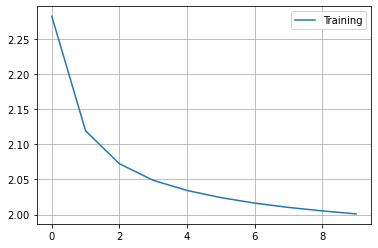

In [55]:
#training time
log = modelmm.fit(X, y, epochs=10, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [59]:
def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, sentence_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed()

X = np.zeros((1, sentence_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = modelmm.predict(X, verbose=0)[0][-1]
    # in previous line predict() gives a tensor of shape (1, 20, 65) 
    # with 1 being the size of the batch, for that we use [0][-1] 
    # to remove the batch dim and get the last prediction : a vector of size 65
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)


Health Enterprissential Paint
Vestment Ency
ZRInfezeQuier
Invento Clata Big Gaming Software Corporation
Jearis
Bountaia
Liger Arreen Management Center
Coopsulances
Mineral
Spect & Corporation
First Business Systems
LODAG
SiemaDL Beve.-Lab Advisors
Kidstrumance
XNetholter
Methirmer Mem Group
Nextmak Burkwells
Thinlin Systems
Delootics
Bella Leison Weiftwoonbeex Limited
Systems Services
Aquad CayHut, Inc."
Electrovery
AetSmipÕs Group
ARISC Communications, Inc"
Drip Technierun Biotherapeutic Addic
